# Bayesian Update Distribution

This notebook reproduces Figure 3 from [Bayesian Flow Networks (Graves et al. 2023)](https://arxiv.org/pdf/2308.07037.pdf). 

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import norm
import torch

plt.rcParams['mathtext.fontset'] = 'cm'
plt.rcParams['font.family'] = 'STIXGeneral'

In [2]:
from bfn.bayesian_flow_networks import bayesian_update_distribuion
from bfn.plotting_utils import set_ticks

## Plotting Code

In [3]:
def visualize_figure_3(x, mu_0, mus, stds, alphas):
  x_range = np.arange(-1.5, 1.5, 0.01)
  colors = plt.cm.viridis(np.linspace(0,1,len(mus)))
  black_color = np.array([[0,0,0,1]])

  plt.figure(figsize=(13,5))

  # plot x
  plt.axvline(x=x, c=colors[0], linestyle='dashed')

  # plot update distribution
  for i, (mu, std, alpha) in enumerate(zip(mus, stds, alphas)):
    plt.plot(
        x_range,
        norm.pdf(x_range, mu.item(), std.item()),
        color=colors[i],
        label=f'$p(\\mu | \\theta_0; \\alpha = {alpha:.3f}$',
    )

  # x ticks
  ticks_labels_colors = [
      (x, f'$x={x}$', black_color),
      (mu_0, f'$\\mu_0={mu_0}$', black_color),
      ]
  ticks_labels_colors += [
      (-1, -1, black_color),
      (1, 1, black_color)]
  tick_values, tick_labels, tick_colors = zip(*ticks_labels_colors)
  set_ticks(tick_values, tick_labels, tick_colors)

  plt.legend(loc='upper left')
  plt.title('Figure 3: Bayesian update distribution for continuous data')

## Reproduce Figure 3

"For $x = 0.7$, the plot shows the update distribution $p_U(\mu | \theta_0, x; \alpha)$ over input mean $\mu$ given initial parameters $\theta_0 = \{\mu_0=0, \rho_0=1\}$ and 11 $\alpha$ values spaced log-linearly between $e^{-5}$ and $e^{5}$." Specifically $p_U(\mu | \theta_0, x; \alpha)$ is a normal distribution centered around $\frac{\alpha x + \mu_{i-1} \rho_{i-1}}{\rho_i}$ with a variance $\frac{\alpha}{\rho_i^2}$. "Note how the distribution is tightly concentrated around $\mu_0$ for very low alpha, then smoothly progresses to a tight concentration arund $x$ for high alpha."

(_The above description is adapted from the caption of Figure 3._)

In [4]:
theta_0 = torch.tensor(0), torch.tensor(1)
x = 0.7
alphas = torch.logspace(-5, 5, 11, base=torch.e)

mus = []
stds = []
for alpha in alphas:
  mu, var = bayesian_update_distribuion(theta_0, x, alpha)

  mus.append(mu)
  stds.append(var**0.5)

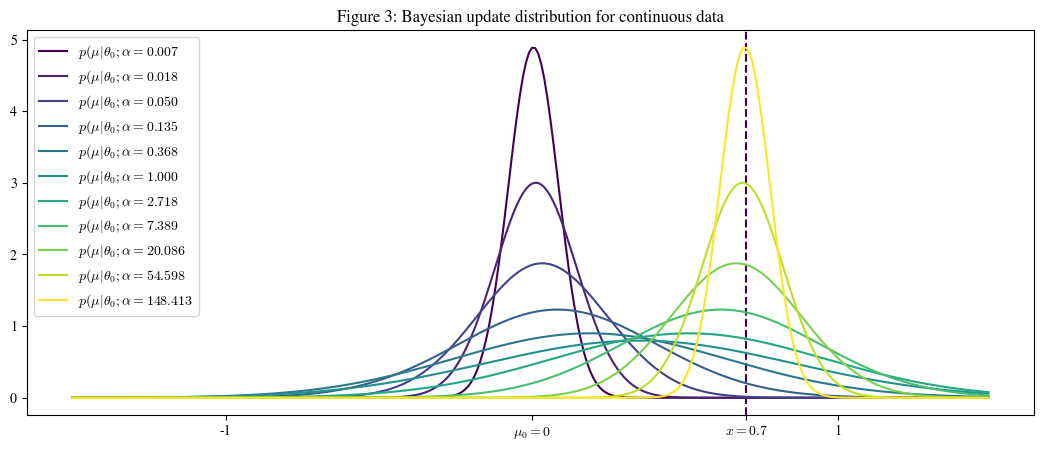

In [5]:
visualize_figure_3(x=x, mu_0=theta_0[0], mus=mus, stds=stds, alphas=alphas)